# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

План работы:
* Открыть файл с данными и изучить общую информацию
* Предобработка данных (удаление явных дубликатов, заполнение пропущенных значений и изменения типов данных на подходящий)
* Провести исследовательский анализ данных

### Открытие файла с данными и изучение общей информации


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

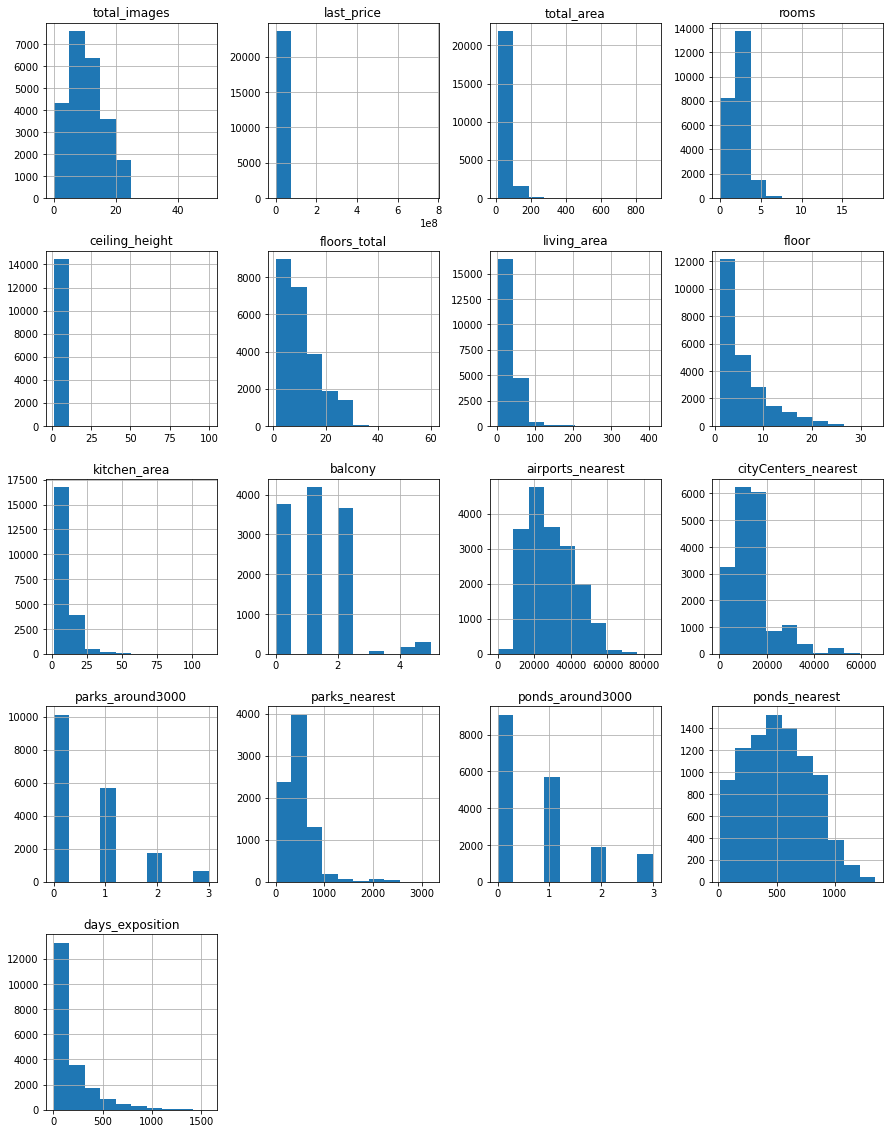

In [1]:
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.hist(figsize=(15, 20))
data.duplicated().sum()
data.isna().sum().sort_values()

# Выводы по общей информации

Цифровые значения без дробной части находящиеся в неподходящем формате float64 или object. Является ли жилье апартаментами находится в строковом типе вместо bool(так как все значения или True или False). Дата первого показа представлена строковым типом вместо даты.

Большое количество пропусков данных в столбцах:

* living_area        -      1903 пропусков
* kitchen_area        -     2278 пропусков
* days_exposition      -    3181 пропусков
* ponds_around3000      -   5518 пропусков
* parks_around3000       -  5518 пропусков
* cityCenters_nearest     - 5519 пропусков
* airports_nearest        - 5542 пропусков
* ceiling_height          - 9195 пропусков
* balcony                - 11519 пропусков
* ponds_nearest          - 14589 пропусков
* parks_nearest          - 15620 пропусков
* is_apartment           - 20924 пропусков

Явных дубликатов по датафрейму нет.

Во всех стольцах есть выбросы,что можно видеть по сдвигу гисограмм влево.

### Предобработка данных

In [2]:
data.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [3]:
for height in data['rooms']:
    data.loc[(data['rooms'] == height) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['rooms'] == height), 'ceiling_height'].mean()

In [4]:
for height2 in data['total_images']:
    data.loc[(data['total_images'] == height2) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['total_images'] == height2), 'ceiling_height'].mean()

In [5]:
for floor in data['total_images'].unique():
    data.loc[(data['total_images'] == floor) & (data['floors_total'].isna()), 'floors_total'] = \
    data['floor']

In [6]:
for area in data['total_images'].unique():
    data.loc[(data['total_images'] == area) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_images'] == area), 'living_area'].mean()

In [7]:
for apartment in data['total_images'].unique():
    data.loc[(data['total_images'] == apartment) & (data['is_apartment'].isna()), 'is_apartment'] = False

In [8]:
for kitchen in data['total_images'].unique():
    data.loc[(data['total_images'] == kitchen) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [9]:
for balc in data['total_images'].unique():
    data.loc[(data['total_images'] == balc) & (data['balcony'].isna()), 'balcony'] = 0

In [10]:
for locality in data['total_images'].unique():
    data.loc[(data['total_images'] == locality) & (data['locality_name'].isna()), 'locality_name'] = 'Undefined'

In [11]:
data.isna().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area                 0
days_exposition          3181
parks_around3000         5518
ponds_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ponds_nearest           14589
parks_nearest           15620
dtype: int64

# ВЫВОДЫ

Пропуски в яйчеках с жилой площадью связаны с тем что для квартир по типу студии данный параметр не рассчитывается, так же как и площадь кухни. Пропуски в ближайших озерах закономерно находятся в паре с пропусками наличия озер в 3км(что может свидетельствововать об отсутсвии таковых). Такое же заключение справделиво и для парков и аэропортов. Пропуски в расстоянии до центра города могли быть не расчитаны если жилье находится непосредственно в центре или если слишком удалено от него и расчеты не проводились. Этажность же могла быть не внесена если дом имеет всего один этаж или половинчатые этажы. Незаполненная локация жилья явно свидетельствует о ошибке сбора данных.
Пропуски в данных с расстояние до центра города и парков,аэропортов и водоемов не заполнянись ни средним ни медианным значением,так как данные брались из картографических центров автоматически,значит для данных локаций данной информации не было. 

In [12]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.716267,11.0,18.600000,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.756499,5.0,34.300000,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.774450,14.0,32.671068,9,False,...,0.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')

In [16]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16    51.000000      8         False  ...   
1        2.716267            11    18.600000      1         False  ...   
2        2.756499             5    34.300000      4         False  ...   
3        2.774450            14    32.671068      9         False  ...   
4        3.030000            14    32.000000     13         False  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0        0  Санкт-Петербург           18863.0   
1 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

# ВЫВОДЫ

Цифровые значения без дробной части находящиеся в формате float64 или object, были переведены в int64 c целью упрощения или в принципе добавления возможности проведения дальнейших расчетов и оценки данных. Является ли жилье апартаментами из строкового хнаечния было переведно в bool,так как все значения были или True или False. Дата первого показа была из строкового значения переведена в в формат даты.

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок','поселок городского типа','коттеджный поселок','поселок при железнодорожной станции','поселок станции'],'поселок', regex=True)
    .replace(['садоводческое некоммерческое товарищество','садоводческое некоммерческое товарищество'],'садовое товарищество', regex=True)
) 

In [20]:
data.duplicated().sum()

0

# Выводы
Явных дубликатов по строкам в датафрейме не выявлено ( не считая повторяющихся значений локаций ,так как в одной и той же докации находятся разные квартиры). Все неявные дубликаты были исправлены ,например городской поселок и посёлок городского типа,коттеджный поселок были приведены к общему названию поселок.

### Добавим в таблицу новые столбцы

In [21]:
data['one_square_price'] = (data['last_price']/data['total_area']).round(2)

In [22]:
data['weekday_of_publication'] = data['first_day_exposition'].dt.weekday

In [23]:
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [24]:
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [25]:
def flooring(data):
    if data['floor'] == data['floors_total']:
        return 'Последний'
    elif data['floor'] == 1:
        return 'Первый'
    return 'Другой'

In [26]:
data['floor_type'] = data.apply(flooring,axis=1)

In [27]:
data['city_center_km'] = (data['cityCenters_nearest']/1000).round(0)

In [28]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16    51.000000      8         False  ...   
1        2.716267            11    18.600000      1         False  ...   
2        2.756499             5    34.300000      4         False  ...   
3        2.774450            14    32.671068      9         False  ...   
4        3.030000            14    32.000000     13         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0               2.0          755.0         

### Проведем исследовательский анализ данных

In [29]:
import matplotlib.pyplot as plt

In [30]:
print(data['total_area'].describe())
total_area_filtr = data.loc[data['total_area'] <= 130]

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

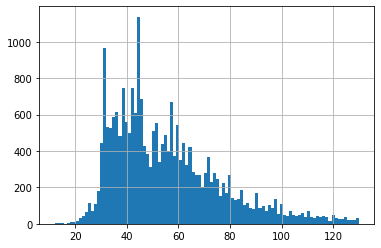

In [31]:
total_area_filtr['total_area'].hist(bins=100)

In [32]:
print(data['living_area'].describe())
living_area_filtr = data.loc[data['living_area'] <= 80]

count    23699.000000
mean        34.401070
std         21.142619
min          2.000000
25%         19.000000
50%         31.100000
75%         41.500000
max        409.700000
Name: living_area, dtype: float64


<AxesSubplot:>

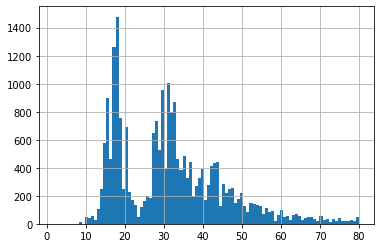

In [33]:
living_area_filtr['living_area'].hist(bins=100)

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

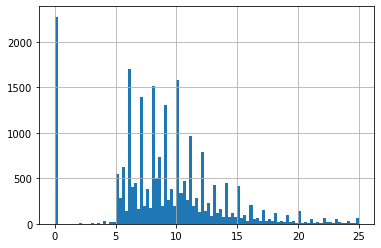

In [34]:
print(data['kitchen_area'].describe())

kitchen_area_filtr = data.loc[data['kitchen_area'] <= 25]
kitchen_area_filtr['kitchen_area'].hist(bins=100)

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

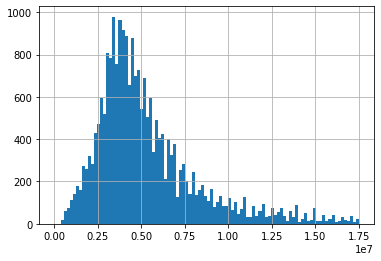

In [35]:
print(data['last_price'].describe())
last_price_filtr = data.loc[(data['last_price'] <= 1.75e+07)&( 1.0e+04 <= data['last_price'])]
last_price_filtr['last_price'].hist(bins=100)

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:>

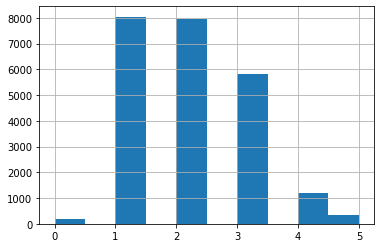

In [36]:
print(data['rooms'].describe())
rooms_filtr = data.loc[data['rooms'] <= 5]
rooms_filtr['rooms'].hist(bins=10)

count    23699.000000
mean         2.768740
std          0.987903
min          1.000000
25%          2.600000
50%          2.716267
75%          2.774450
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

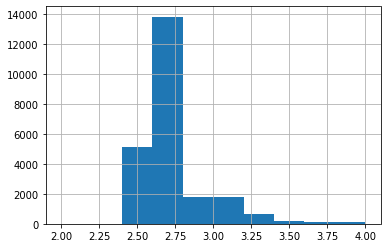

In [37]:
print(data['ceiling_height'].describe())
ceiling_height_filtr = data.loc[(data['ceiling_height'] <=4)&(data['ceiling_height'] >=2 )]
ceiling_height_filtr['ceiling_height'].hist(bins=10)

count      23699
unique         3
top       Другой
freq       17363
Name: floor_type, dtype: object


<AxesSubplot:>

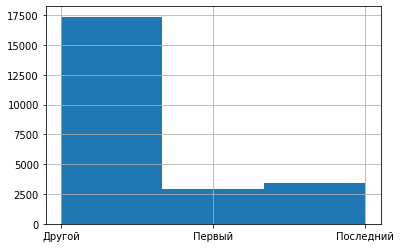

In [38]:
print(data['floor_type'].describe())
data['floor_type'].hist(bins=3)

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

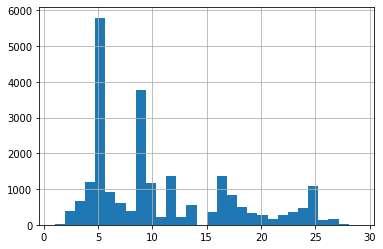

In [39]:
print(data['floors_total'].describe())
floors_total_filtr = data.loc[data['floors_total'] <30]
floors_total_filtr['floors_total'].hist(bins=30)

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:>

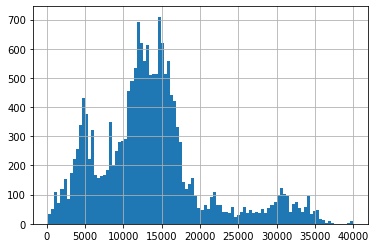

In [40]:
print(data['cityCenters_nearest'].describe())
cityCenters_neares_filtr = data.loc[data['cityCenters_nearest'] <=40000]
cityCenters_neares_filtr['cityCenters_nearest'].hist(bins=100)

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

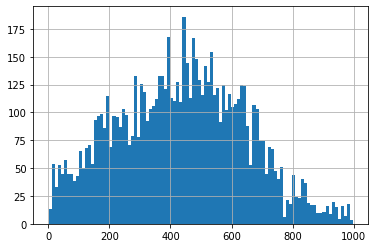

In [41]:
print(data['parks_nearest'].describe())
parks_nearest_filtr = data.loc[data['parks_nearest'] <= 1000] 
parks_nearest_filtr['parks_nearest'].hist(bins=100)

# ВЫВОДЫ по гистограммам
* Значения общей площади жилья в целом находится в пределах до 80 м2,все значения выше 130 были отнесены к выбросам- основной массив показателей находится в помещениях площадью от 35 до 60 метров.
* Значения жилой площади больше 80 метров были признаны тоже выбросами и основное распределение данных в площади около 15 и 35 метров (разница вдвое между "однушками" и "двушками")
* Основное количество жилых помещений имеет от 1 до 3 квартир, варианты с количеством 0 отнесены ко студиям,а все варианты больше 5 квартир к выбросам.
* Значения высоты потолков больше 4 метров не рассматривались и и были отнесены к выбросам и оштбкам сбора информации,как и потолки ниже 2 метров.
* Распределние по этажности показывает ,что основной массив квартир находится НЕ на первом или последнем этаже. Стоит учитывать ,что в графу с последним этажом попало большое количество квартир которые в данных были указаны на 0 этаже и количество всего этаже в доме было тоже 0.
* Дома с количеством этажей больше 30 были отнесены к выбросам и следуя из гистограммы следует,что в массиве больше всего пяти и 9тиэтажек.
* Большинство квартир находится в 10-17 км от центра города(спальные районы и прилегающие поселки)
* Ближайшие парки к большинству квартир расположены от 300 до 600м. Расстояния свыше километра не рассматривались ,а больше 3000 были отнесены к ошибкам сбора информации (так как в графу должны были попасть только парки в районе 3000 м)

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
95.0


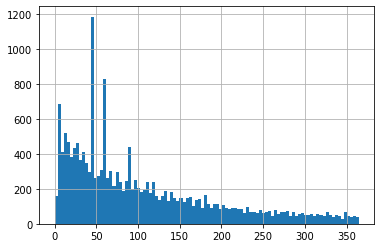

In [42]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins=100,range=(0,365))
print(data['days_exposition'].median())

# ВЫВОД ПО СКОРОСТИ ПРОДАЖ
Исходи из гистограммы и среднего и медианного значения, так же факта ,что все пропуски значений были заменены на среднее значение можно сделать следующие выводы:
* Основное количество сделок или еще не завершены с момента публикации обьявления или созданы в момент сбора информации и пробыли на сайте 0 дней.
* В среднем квартиры продаются в первые 150-200 дней, преимущественно на 40-45 день.
* Продажи совершенные в период первых 45 дней публикации можно отнести к быстрым, а вот все продажи совершенные позднее чем через полгода (180 дней) к долгим.
* Продажи соверщенные более через год от момента публикации не учитывались,так как вероятнее всего не были обновлены данные на сайте о продаже квартиры или квартира не соответсвовала описанию или ожиданиям покупателей на рынке.


<AxesSubplot:xlabel='total_area'>

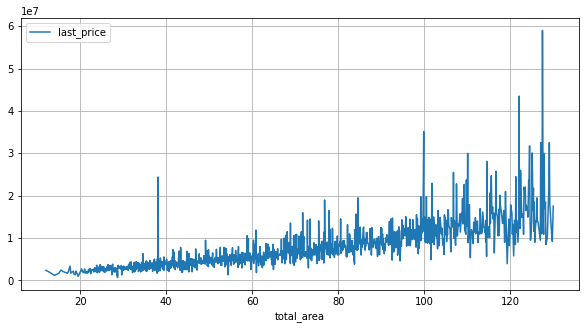

In [43]:
total_area_filtr.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))

<AxesSubplot:xlabel='living_area'>

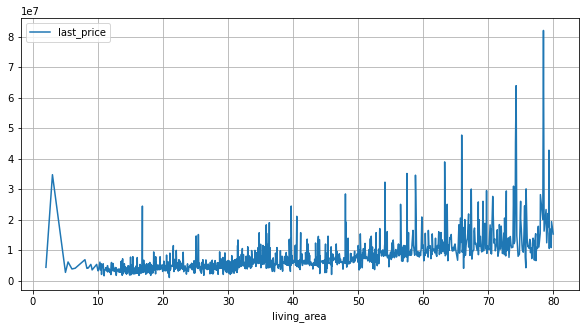

In [44]:
living_area_filtr.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))

<AxesSubplot:xlabel='kitchen_area'>

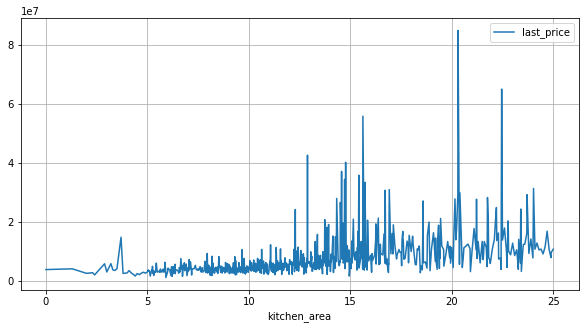

In [45]:
kitchen_area_filtr.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))

<AxesSubplot:xlabel='rooms'>

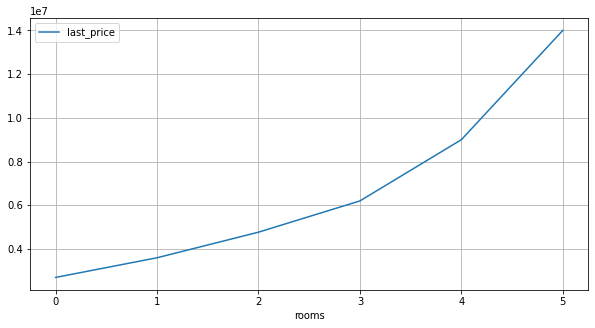

In [46]:
rooms_filtr.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))

<AxesSubplot:xlabel='floor_type'>

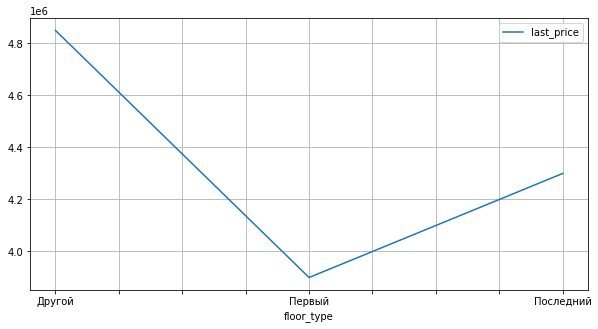

In [47]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))

<AxesSubplot:xlabel='weekday_of_publication'>

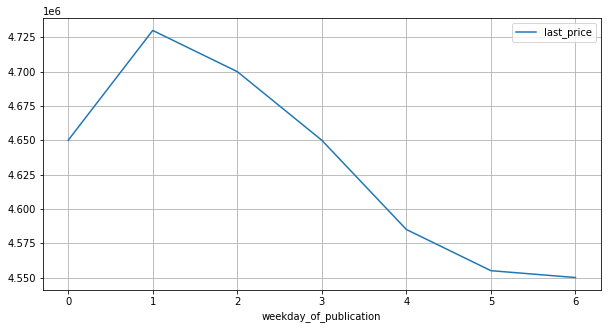

In [48]:
data.pivot_table(index='weekday_of_publication', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))

<AxesSubplot:xlabel='month_of_publication'>

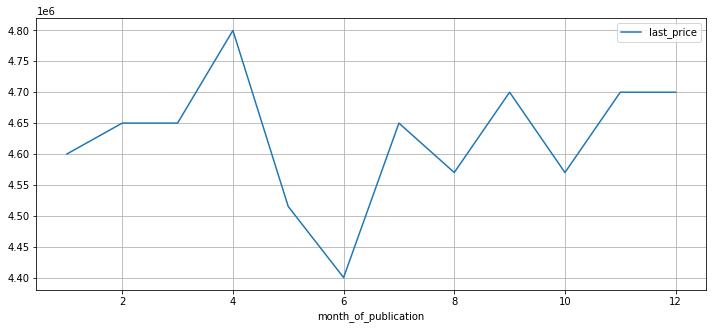

In [49]:
data.pivot_table(index='month_of_publication', values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='year_of_publication'>

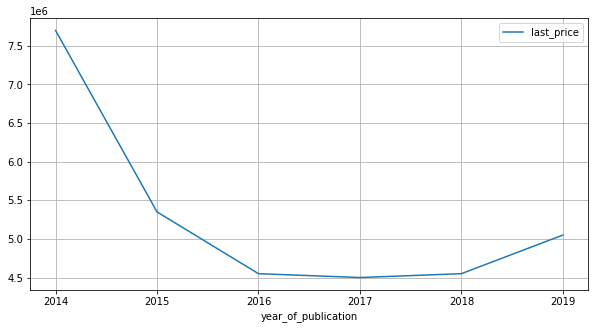

In [50]:
data.pivot_table(index='year_of_publication', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))

# Выводы
* Чем больше общая площадь жилья,тем выше цена.
* Такие же тенденции сохраняются с жилой площадью,за исклюением подьема цен для квартир студий ,у который жилая плозаль нулевая.
* Прямая зависимость с увеличением цены на жилье и количеством комнат.
* Самая низкая стоимость у квратир на первом этаже, наибольшей популярностью и наивысшим ценником обладают квратиры не на первоим и не на последнем этажах
* Наибольшие продажи квартир были соверешены в пятницу,а меньше всего в воскресенье(большинство риелторов выходные).
* Цены на квратиры в 2014 году были максимальными ,с последующим резким падением цен до 2018 года. В 2019 начался новый рост цен.

In [51]:
last_price_filtr = data.loc[data['last_price'] <= 1.75e+07]
data_square_price = last_price_filtr.pivot_table(index = 'locality_name', values = 'one_square_price',aggfunc='count').sort_values('one_square_price', ascending=False).head(10)
data_square_price

,one_square_price
locality_name,
Санкт-Петербург,14835
поселок Мурино,556
поселок Шушары,440
Всеволожск,397
Пушкин,360
Колпино,337
поселок Парголово,327
Гатчина,307
деревня Кудрово,299


In [52]:
good_data_square = last_price_filtr.query('locality_name in @data_square_price.index')
good_data_square = good_data_square.pivot_table(index = 'locality_name', values = 'one_square_price',aggfunc='mean').round(2).sort_values('one_square_price', ascending=False)
data_square_price['good_data_square'] = good_data_square
data_square_price

,one_square_price,good_data_square
locality_name,,
Санкт-Петербург,14835,108025.17
поселок Мурино,556,85681.76
поселок Шушары,440,78677.36
Всеволожск,397,67214.25
Пушкин,360,101788.57
Колпино,337,75333.30
поселок Парголово,327,90175.91
Гатчина,307,68746.15
деревня Кудрово,299,92473.55


In [53]:
data_square_price.rename(columns = {'one_square_price':'count', 'good_data_square':'mean_square_price'}, inplace = True)
data_square_price.sort_values('mean_square_price', ascending=False)

,count,mean_square_price
locality_name,,
Санкт-Петербург,14835,108025.17
Пушкин,360,101788.57
деревня Кудрово,299,92473.55
поселок Парголово,327,90175.91
поселок Мурино,556,85681.76
поселок Шушары,440,78677.36
Колпино,337,75333.30
Гатчина,307,68746.15
Всеволожск,397,67214.25


# Вывод по цене квадратного метра
Самый дорогой квадратный метр в Санкт-Петербурге,что не удивительно учитывая количество объявлений в локации и конкурентности.Поселок Мурино,Парголово, Шушары и деревня Кудрово находятся прямо за чертой Питера,поэтому цены на квадратный метр в них хоть и дешевле Питера,но практически вдвое дороже чем в Выборге,до которого требуется на поезде провести в пути около часа по прямому сообщению. Напротив же на втором месте по ценнику находится Пушкин,что обьясняется тем ,что хоть он и находиться дальше от Питера ,но он так же находится дальше от аэропорта чем Шущары и дальше от промышленных зон чем все остальные деревни и поселки в Ленинградском районе, а так же наличие рядом Екатериненского дворца и прямого сообщения по жд увеличивает стоимость жилья значительно. Минимальная цена из первой десятки в Выборге, хоть и город является одной из главных туристических локаций при посещении Ленинградской области и находится в непосредственной близости от границы с Финляндией, расстояние от него до ближайших крупных городов все равно более часа,что и снижает стоимость его квадратного метра.

<AxesSubplot:xlabel='city_center_km'>

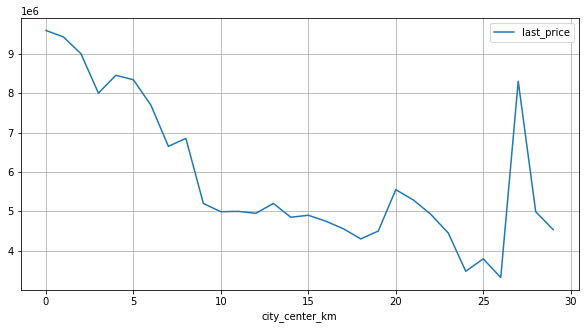

In [54]:
data_spb = last_price_filtr.loc[data['locality_name'] == 'Санкт-Петербург']
data_spb.pivot_table(index='city_center_km', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))

# ВЫВОД ПО ПЕТЕРБУРГСКИМ КВАРТИРАМ
Цена на квартиры падает ,чем дальше от центра с каждым километром, заново возрастая в районе 20 и 27 км,что свидетельствует что наибольшей популярностью пользуются районы ближе к центру. Результаты с расстоянием больше 20 км рассматривать нелогично так как это явные ошибки с записью расположения квартиры, так как в 30 км от центра Питера уже не Питер.

### Напишите общий вывод

На этапе предобработки данных были:
* Найдены и изучены пропущенные значения в столбцах
* Заполнены пропущенные значения там, где это возможно.
* Пропуски в данных с расстояние до центра города и парков,аэропортов и водоемов не заполнянись ни средним ни медианным значением,так как данные брались из картографических центров автоматически,значит для данных локаций данной информации не было. 
* Цифровые значения без дробной части находящиеся в формате float64 или object, были переведены в int64 c целью упрощения или в принципе добавления возможности проведения дальнейших расчетов и оценки данных. Является ли жилье апартаментами из строкового хнаечния было переведно в bool,так как все значения были или True или False. Дата первого показа была из строкового значения переведена в в формат даты.
* Изучены уникальные значения в столбце с названиями и устранены неявные дубликаты.
* Были добавлены в таблицу новые столбцы со следующими данными:цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «‎первый», «последний», «другой»),расстояние до центра города в километрах.

Был проведен исследовательский анализ данных:
* Значения общей площади жилья в целом находится в пределах до 80 м2,все значения выше 130 были отнесены к выбросам- основной массив показателей находится в помещениях площадью от 35 до 60 метров.
* Значения жилой площади больше 80 метров были признаны тоже выбросами и основное распределение данных в площади около 15 и 35 метров (разница вдвое между "однушками" и "двушками")
* Основное количество жилых помещений имеет от 1 до 3 квартир, варианты с количеством 0 отнесены ко студиям,а все варианты больше 5 квартир к выбросам.
* Значения высоты потолков больше 4 метров не рассматривались и и были отнесены к выбросам и оштбкам сбора информации,как и потолки ниже 2 метров.
* Распределние по этажности показывает ,что основной массив квартир находится НЕ на первом или последнем этаже. Стоит учитывать ,что в графу с последним этажом попало большое количество квартир которые в данных были указаны на 0 этаже и количество всего этаже в доме было тоже 0.
* Дома с количеством этажей больше 30 были отнесены к выбросам и следуя из гистограммы следует,что в массиве больше всего пяти и 9тиэтажек.
* Большинство квартир находится в 10-17 км от центра города(спальные районы и прилегающие поселки)
* Ближайшие парки к большинству квартир расположены не далее и не ближе 500 м. Расстояния свыше километра не рассматривались ,а больше 3000 были отнесены к ошибкам сбора информации (так как в графу должны были попасть только парки в районе 3000 м)

Исходя из гистограммы и среднего и медианного значения, так же факта ,что все пропуски значений были заменены на среднее значение можно сделать следующие выводы:
* Основное количество сделок или еще не завершены с момента публикации обьявления или созданы в момент сбора информации и пробыли на сайте 0 дней.
* В среднем квартиры продаются в первые 200 дней, преимущественно на 40-45 день и 170-180 дни.
* Продажи совершенные в период первых 45 дней публикации можно отнести к быстрым, а вот все продажи совершенные позднее чем через полгода (180 дней) к долгим.
* Ближайшие парки к большинству квартир расположены от 300 до 600м. Расстояния свыше километра не рассматривались ,а больше 3000 были отнесены к ошибкам сбора информации (так как в графу должны были попасть только парки в районе 3000 м)

Самый дорогой квадратный метр в Санкт-Петербурге.Поселок Мурино,Парголово, Шушары и деревня Кудрово находятся прямо за чертой Питера,поэтому цены на квадратный метр в них хоть и дешевле Питера,но практически вдвое дороже чем в Выборге,до которого требуется на поезде провести в пути около часа по прямому сообщению. Напротив же на втором месте по ценнику находится Пушкин.

Цена на квартиры в Санкт_Петербурге падает ,чем дальше от центра с каждым километром, заново возрастая в районе 20 и 27 км,что свидетельствует что наибольшей популярностью пользуются районы ближе к центру. Результаты с расстоянием больше 20 км рассматривать нелогично так как это явные ошибки с записью расположения квартиры, так как в 30 км от центра Питера уже не Питер.
